# requests 모듈을 이용한 웹 요청
- [Requests 홈페이지](https://requests.kennethreitz.org/en/master/)
- **HTTP 요청을 처리하는 파이썬 패키지**
- get/post 방식 모두를 지원하며 쿠키, 헤더정보등을 HTTP의 다양한 요청처리를 지원한다.
- 설치
    - `pip install requests`
    - `conda install -c conda-forge requests`

## Crawling을 위한 requests 코딩 패턴
1. requests의 get()/post() 함수를 이용해 url을 넣어 서버 요청한다.
3. 응답받은 내용을 처리.
    - text(HTML)은 BeautifulSoup에 넣어 parsing
    - binary 파일의 경우 파일출력을 이용해 local에 저장

## 요청 함수
- get(): GET방식 요청
- post(): POST방식 요청

### requests.get(URL)
- **GET 방식 요청**
- **주요 매개변수**
    - params: 요청파라미터를 dictionary로 전달
    - headers: HTTP 요청 header를 dictionary로 전달
        - 'User-Agent', 'Referer' 등 헤더 설정
    - cookies: 쿠키정보를 전달
- **반환값(Return Value)**
    - [Response](#Response객체): 응답결과

### requests.post(URL)
- **POST 방식 요청**
- **주요 매개변수**
    - datas : 요청파라미터를 dictionary로 전달
    - files : 업로드할 파일을 dictionary로 전달
        - key: 이름, value: 파일과 연결된 InputStream(TextIOWrapper)
    - headers: HTTP 요청 header를 dictionary로 전달
        - 'User-Agent', 'Referer' 등 헤더 설정
    - cookies: 쿠키정보를 전달
- **반환값(Return Value)**
    - [Response](#Response객체): 응답결과

> ### 요청파라미터(Request Parameter)
> - 요청파라미터란?
>     - 서버가 일하기 위해 클라이언트로 부터 받아야하는 값들
>     - `name=value` 형태이며 여러개일 경우 `&`로 연결해서 전송됨
> - Get 요청시 queryString 으로 전달
>     - querystring : URL 뒤에 붙여서 전송한다.
>     - ex) https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=python
>     - requests.get() 요청시 
>         1. url 뒤에 querystring으로 붙여서 전송
>         2. dictionary 에 name=value 형태로 만들어 매개변수 params에 전달
> - Post 요청시 요청정보의 body에 넣어 전달

> ### HTTP 요청 헤더(Request Header)
> HTTP 요청시 웹브라우저가 client의 여러 부가적인 정보들을 Key-Value 쌍 형식으로 전달한다.
> - accept: 클라이언트가 처리가능한 content 타입 (Mime-type 형식으로 전달)
> - accept-language: 클라이언트가 지원하는 언어(ex: ko, en-US)
> - host: 요청한 host 
> - user-agent: 웹브라우저 종류

## Response객체 -  응답데이터
- get()/post() 의 요청에 대한 서버의 응답 결과를 Response에 담아 반환
    - Response의 속성을 이용해 응답결과를 조회
- 주요 속성(Attribut)
    - **url**
        - 응답 받은(요청한) url 
    - **status_code**
        - HTTP 응답 상태코드
    - **headers**
        - 응답 header 정보를 dictionary로 반환
- **응답 결과 조회**
    - **text**
        - 응답내용(html을 str로 반환)
    - **content**
        - 응답내용(응답결과가 binary-image, 동영상등- 일 경우사용하며 bytes로 반환)
    - **json()**
        - 응답 결과가 JSON 인 경우 dictionary로 변환해서 반환

> ### JSON(JavaScript Object Notation)
> key-value 형태 또는 배열 형태의 text이며 이 기종간 데이터 교환에 많이 사용된다. 자바스크립트 언어에서 Object와 array를 생성하는 문법을 이용해 만듬. 
- [JSON 공식사이트](http://json.org)
>
> ### json 모듈
> JSON 형식 문자열을 다루는 모듈
> - json.loads(json문자열)
>    - JSON 형식 문자열을 dictionary로 변환
> - json.dumps(dictionary)
>    - dictionary를 JSON 형식 문자열로 변환

> ### HTTP 응답 상태코드
> - https://developer.mozilla.org/ko/docs/Web/HTTP/Status 
- 2XX: 성공
    - 200: OK
- 3XX: 다른 주소로 이동 (이사)
    - 300번대이면 자동으로 이동해 준다. 크롤링시는 볼일이 별로 없다.
- 4XX: 클라이언트 오류 (사용자가 잘못한 것)
  - 404: 존재하지 않는 주소
- 5XX: 서버 오류 (서버에서 문제생긴 것)
  - 500: 서버가 처리방법을 모르는 오류
  - 503: 서버가 다운 등의 문제로 서비스 불가 상태

In [1]:
import requests
from bs4 import BeautifulSoup
url = "https://www.naver.com/"

res = requests.get(url)  # 요청 ~ 응답
print(type(res.text))
print(res.status_code)
if res.status_code == 200:
    print(res.headers)
    soup = BeautifulSoup(res.text)
    
else:
    print("문제 발생")


<class 'str'>
200
{'Date': 'Tue, 19 Mar 2024 08:30:22 GMT', 'content-type': 'text/html; charset=UTF-8', 'transfer-encoding': 'chunked', 'set-cookie': 'PM_CK_loc=6e1cc625346a560d6d5172e04e39fe07de5f0f137ff002d23c63416fbae592dd; Expires=Wed, 20 Mar 2024 08:30:22 GMT; Path=/; HttpOnly', 'cache-control': 'no-cache, no-store, must-revalidate', 'pragma': 'no-cache', 'x-frame-options': 'DENY', 'x-xss-protection': '1; mode=block', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=63072000; includeSubdomains', 'referrer-policy': 'unsafe-url', 'server': 'nfront'}


In [2]:
type(res)

requests.models.Response

### Get 방식 요청 예제

In [3]:
import requests
from pprint import pprint

base_url = "https://httpbin.org/{}"

url = base_url.format("get")
print(url)


# 요청파라미터 -> dictionary로 name:value 형식을 저장. 같은 이름으로 여러개 값을 
#                       보낼 경우 name:[value1, value2,...]
req_param = {
    "name":"홍길동", 
    "age":[20, 30, 40],
    "address":"서울"
}
# url = "https://httpbin.org/get?name=홍길동&age=30&address=부산&age=30&age=40"

# header user-agent 설정 => 웹브라우져 종류(엔진)
#    개발자 도구: 콘솔 - navigator.userAgent
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
headers = {
    'User-Agent':user_agent,
    'my-data':"test value"
}

response = requests.get(url, # 요청 url
                        params=req_param,  #요청파라미터 
                        headers=headers)   #요청 header 


print('응답상태코드:', response.status_code)
if response.status_code == 200: #정상응답
    # 응답데이터를 출력
#     txt = response.text
    txt = response.json()
    print(type(txt))
#     print(txt["headers"]['Accept'])
    pprint(txt)

https://httpbin.org/get
응답상태코드: 200
<class 'dict'>
{'args': {'address': '서울', 'age': ['20', '30', '40'], 'name': '홍길동'},
 'headers': {'Accept': '*/*',
             'Accept-Encoding': 'gzip, deflate',
             'Host': 'httpbin.org',
             'My-Data': 'test value',
             'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                           'AppleWebKit/537.36 (KHTML, like Gecko) '
                           'Chrome/112.0.0.0 Safari/537.36',
             'X-Amzn-Trace-Id': 'Root=1-65f94d22-0f68f24906816c3171f59b1d'},
 'origin': '222.112.208.67',
 'url': 'https://httpbin.org/get?name=홍길동&age=20&age=30&age=40&address=서울'}


### Post 요청 예

In [7]:
import requests
from pprint import pprint

base_url = "https://httpbin.org/{}"

url = base_url.format("post")
print(url)


# 요청파라미터 -> dictionary로 name:value 형식을 저장. 같은 이름으로 여러개 값을 
#                       보낼 경우 name:[value1, value2,...]
req_param = {
    "name":"홍길동", 
    "age":[20, 30, 40],
    "address":"서울"
}
# url = "https://httpbin.org/get?name=홍길동&age=30&address=부산&age=30&age=40"

# header user-agent 설정 => 웹브라우져 종류(엔진)
#    개발자 도구: 콘솔 - navigator.userAgent
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
headers = {
    'User-Agent':user_agent,
    'my-data':"test value"
}

# 파일 업로드: 딕셔너리에 {이름: input stream}
f = open('img.jpg', 'rb')
files = {
    "notebook":f
}
response = requests.post(url, # 요청 url
                        data=req_param,  #요청파라미터 
                        headers=headers,   #요청 header 
                        files=files) # 업로드할 파일.
f.close()


print('응답상태코드:', response.status_code)
if response.status_code == 200: #정상응답
    # 응답데이터를 출력
#     txt = response.text
    txt = response.json()
    print(type(txt))
#     print(txt["headers"]['Accept'])
    pprint(txt)

https://httpbin.org/post
응답상태코드: 200
<class 'dict'>
{'args': {},
 'data': '',
 'files': {'notebook': 'data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gODAK/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8AAEQgCHALpAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1

In [21]:
txt['files']['notebook']

'data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gODAK/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8AAEQgCHALpAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8AyyOOKTFSUnFfWHz1yPikIqUimMMUDTGEUxlqSkNBVyIilAp5FI

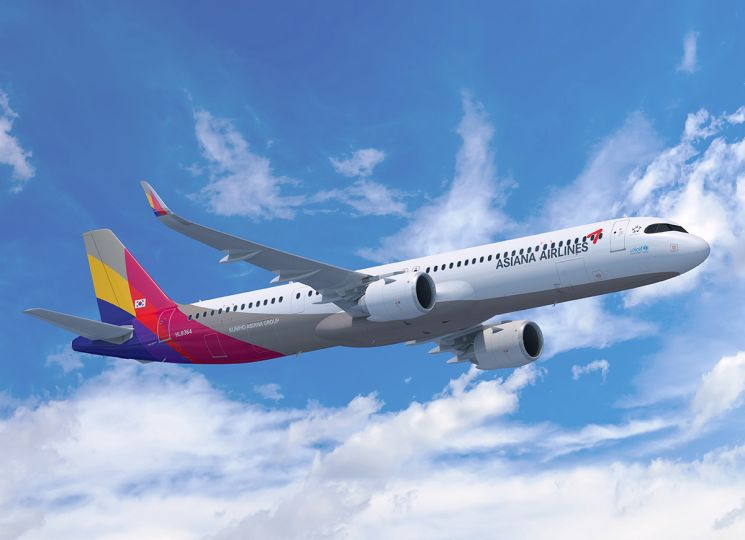

In [20]:
import base64
import io
decode =  base64.b64decode(txt['files']['notebook'].split(",")[1])  # 앞 data:application/octet-stream;base64, 를 짤라내야 한다. 
from PIL import Image
Image.open(io.BytesIO(decode))

In [22]:
# --------- 참고 
# image -> base64 (binary 를 ascii로 변환 -> image)

# import base64
# import io
# from PIL import Image

# # 이미지를 base64 변환
# img_in = open('./img.jpg', 'rb')
# base64_str = base64.b64encode(img_in.read())
# print(base64_str[:100])
# imgdata = base64.b64decode(base64_str)

# # base64를 이미지로 변환 
# img_out = Image.open(io.BytesIO(imgdata))
# img_out

### 응답결과(Response) 조회

In [23]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.pythonscraping.com/pages/warandpeace.html'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'

# 요청
response = requests.get(url, headers={"User-Agent":user_agent})
if response.status_code == 200: #정상응답이 왔다면
    result_green = []
    # html을 조회
    txt = response.text
#     print(txt[:1000])
    soup = BeautifulSoup(txt, "lxml")
    tag_list = soup.find_all('span', attrs={"class":"green"})
#     tag_list = soup.select("span.green")
    print(len(tag_list))
    for tag in tag_list:
        result_green.append(tag.text.replace('\n', ' '))  #텍스트 중간의 enter를 공백으로 변환

else:
    print("문제 발생: ", response.status_code)

41


In [24]:
result_green

['Anna Pavlovna Scherer',
 'Empress Marya Fedorovna',
 'Prince Vasili Kuragin',
 'Anna Pavlovna',
 'St. Petersburg',
 'the prince',
 'Anna Pavlovna',
 'Anna Pavlovna',
 'the prince',
 'the prince',
 'the prince',
 'Prince Vasili',
 'Anna Pavlovna',
 'Anna Pavlovna',
 'the prince',
 'Wintzingerode',
 'King of Prussia',
 'le Vicomte de Mortemart',
 'Montmorencys',
 'Rohans',
 'Abbe Morio',
 'the Emperor',
 'the prince',
 'Prince Vasili',
 'Dowager Empress Marya Fedorovna',
 'the baron',
 'Anna Pavlovna',
 'the Empress',
 'the Empress',
 "Anna Pavlovna's",
 'Her Majesty',
 'Baron Funke',
 'The prince',
 'Anna Pavlovna',
 'the Empress',
 'The prince',
 'Anatole',
 'the prince',
 'The prince',
 'Anna Pavlovna',
 'Anna Pavlovna']

## daum new 리스트(목록)
- 기사제목 - 링크url

In [25]:
print(url)

http://www.pythonscraping.com/pages/warandpeace.html


In [26]:
%%writefile daum_new_list.py

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://news.daum.net"
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'

def get_news_list():
    """
    daum 뉴스 목록 조회
    조회결과는 pandas의 DataFrame(표) 로 만들어서 반환.
    """
    # 요청
    response = requests.get(url, headers={'User-Agent':user_agent})
    # 상태코드가 200 인지 확인.
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'lxml')
        tag_list = soup.select("ul.list_newsissue > li strong > a")
        print(len(tag_list))
        link_list = []
        title_list = []
        for tag in tag_list:
            link_list.append(tag.get("href"))
            title_list.append(tag.get_text().strip())
            
        return pd.DataFrame({
            "title":title_list,
            "link":link_list
        })
    else:
        print("문제발생:", response.status_code)
        
if __name__ == "__main__":
    from datetime import datetime 
    d = datetime.now().strftime("%Y-%m-%d")  # strftime(): 날짜시간을 원하는 형태의 문자열로 변환.
    file_path = f"daum_new_list_{d}.csv"
    print(file_path)
    result = get_news_list()
    # # csv 파일로 저장
    result.to_csv(file_path, index=False) #utf-8 형식으로 저장.

Writing daum_new_list.py


# 이미지(바이너리파일) 다운로드


In [27]:
import requests

url = "https://boatshow.kr/image/SEARAY/da_370_ob.jpg"
response = requests.get(url)
print(response.status_code)

200


In [28]:
if response.status_code == 200:
    #response에서 받아온 이미지(binary)를 조회
#     result = response.content
#     print(type(result))
    with open('image.jpg', "wb") as fw:
        fw.write(response.content)

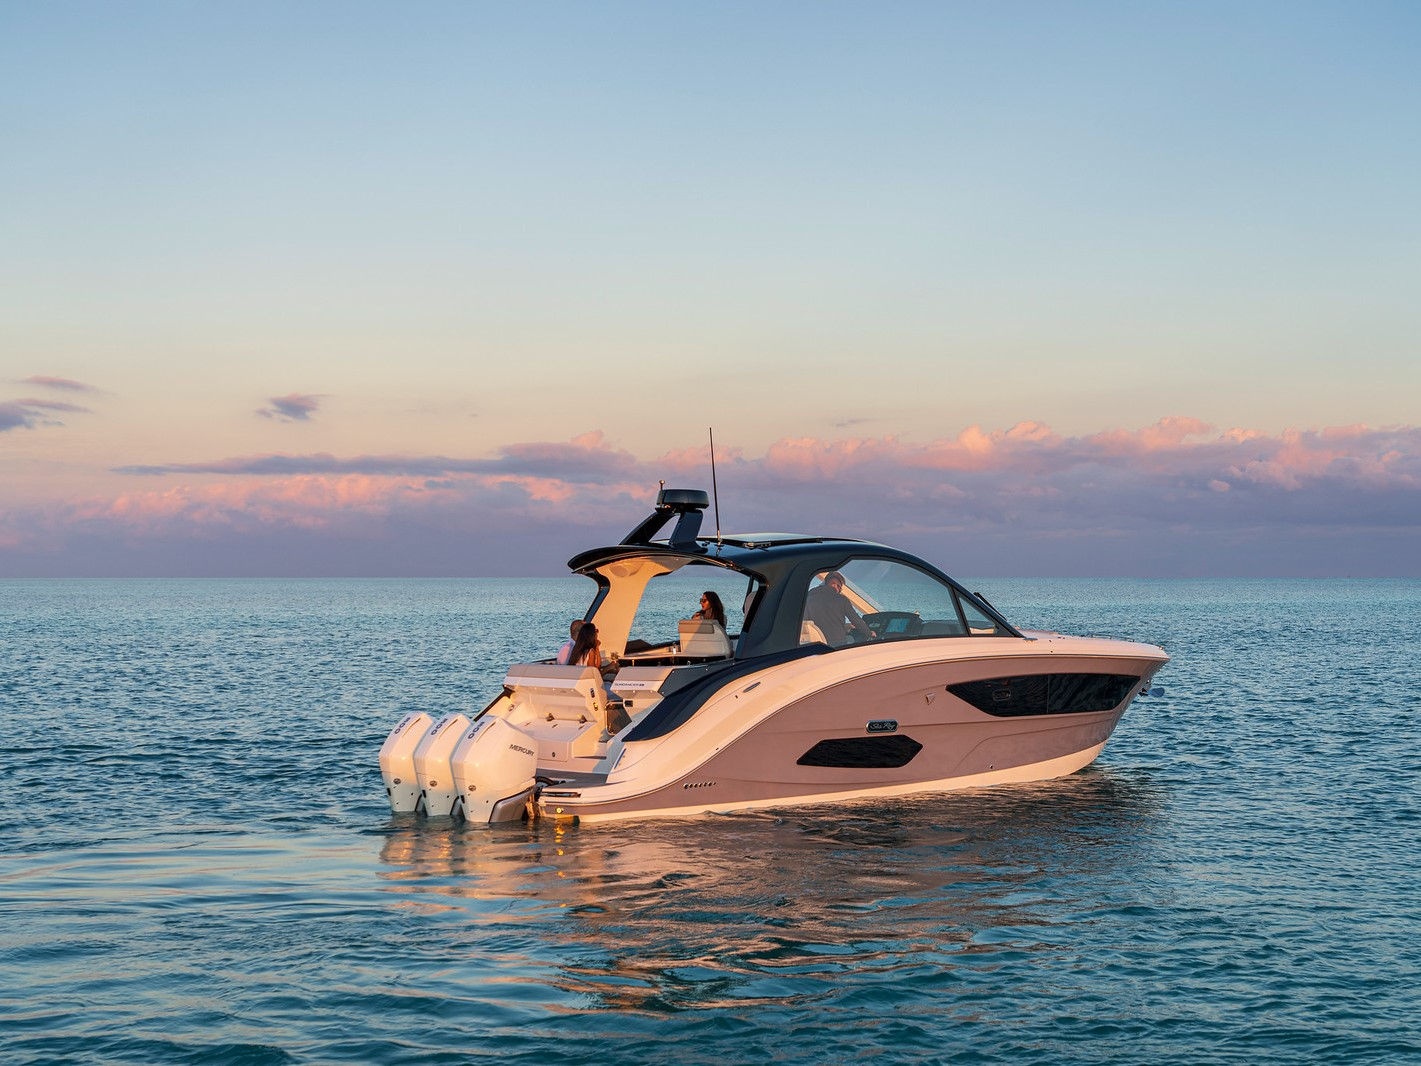

In [29]:
Image.open("image.jpg")